In [18]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

df_goog = pd.read_csv('../../DSI-CHI-1/lessons/week-10/2.1-intro-to-time-series/assets/datasets/goog.csv')

Populating the interactive namespace from numpy and matplotlib


Take a high-level look at the data. Describe it. What are we looking at? Hint: We can use our `plot` function to provide a good visual.

In [21]:
df_goog.sort_values(by='Date', ascending=True, inplace=True) 
df_goog = df_goog.loc[(df_goog['Date'] != '2014-03-27')]

In [22]:
df_goog.head()

,Date,Open,High,Low,Close,Volume,Adj Close
20,2014-04-01,558.712585,604.832764,502.802277,526.662415,3290800,526.662415
19,2014-05-01,527.112366,567.842590,503.302277,559.892578,1828500,559.892578
18,2014-06-02,560.702576,582.452637,538.752441,575.282593,1872200,575.282593
17,2014-07-01,578.322632,599.652710,565.012573,571.602539,1668800,571.602539
16,2014-08-01,570.402588,587.342651,560.002563,571.602539,1368800,571.602539


Looking a little deeper, let's gauge the integrity of our data. Is there any cleaning we can do? 

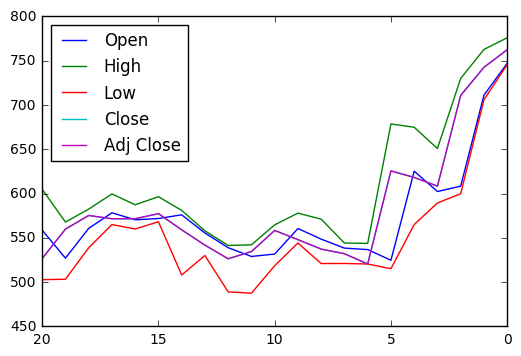

In [23]:
df_goog[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot()

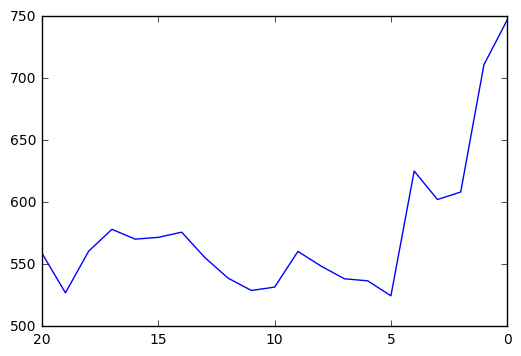

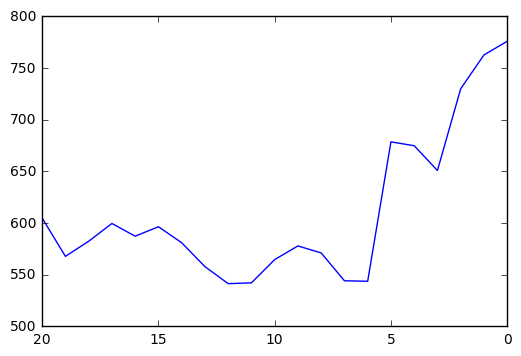

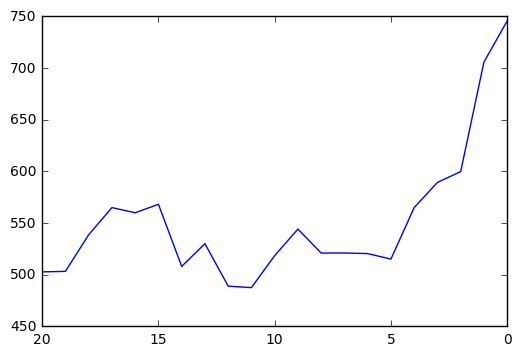

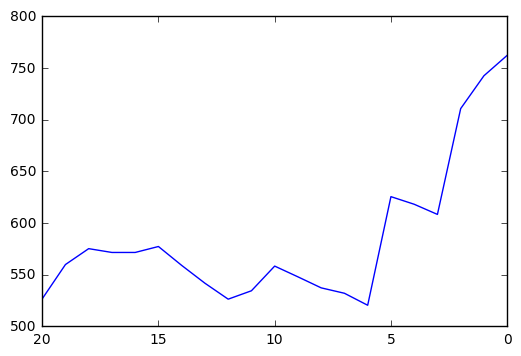

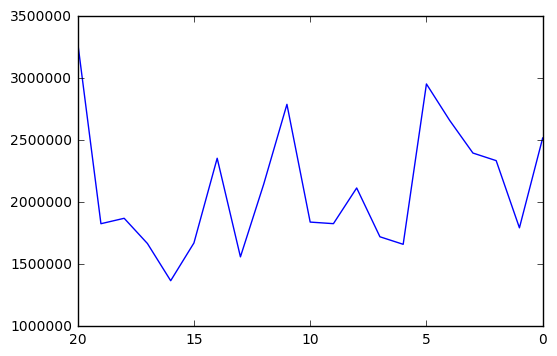

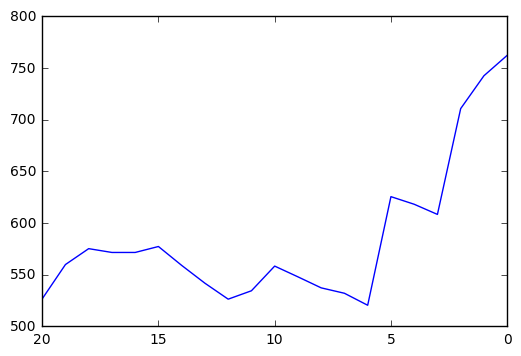

In [24]:
for col in ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']:
    df_goog[col].plot()
    plt.show()

Let's examine the Date column. We should probably make it the index for our DataFrame, as we need to order the data by time. Doing this will result in 6 Series objects indexed by DateTime- literal Time Series!

In [25]:
df_goog.set_index('Date', inplace=True)
df_goog.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-04-01,558.712585,604.832764,502.802277,526.662415,3290800,526.662415
2014-05-01,527.112366,567.842590,503.302277,559.892578,1828500,559.892578
2014-06-02,560.702576,582.452637,538.752441,575.282593,1872200,575.282593
2014-07-01,578.322632,599.652710,565.012573,571.602539,1668800,571.602539
2014-08-01,570.402588,587.342651,560.002563,571.602539,1368800,571.602539


We need to convert the string to a DateTime object. Pandas has a built in function for this! We should also ensure that the dates are sorted.

In [26]:
df_goog.index = df_goog.index.to_datetime()
df_goog.index.dtype

dtype('<M8[ns]')

Let's add some more columns with useful data extracted from the DateTime index.

In [29]:
df_goog['year'] = df_goog.index.year
df_goog['month'] = df_goog.index.month
df_goog['weekday'] = df_goog.index.strftime('%A')
df_goog.head()

,Open,High,Low,Close,Volume,Adj Close,year,month,weekday
2014-04-01,558.712585,604.832764,502.802277,526.662415,3290800,526.662415,2014,4,Tuesday
2014-05-01,527.112366,567.842590,503.302277,559.892578,1828500,559.892578,2014,5,Thursday
2014-06-02,560.702576,582.452637,538.752441,575.282593,1872200,575.282593,2014,6,Monday
2014-07-01,578.322632,599.652710,565.012573,571.602539,1668800,571.602539,2014,7,Tuesday
2014-08-01,570.402588,587.342651,560.002563,571.602539,1368800,571.602539,2014,8,Friday


Let's walk through adding a dummy variable to flag days where the Close price was higher than the Open price

In [30]:
df_goog['good_month'] = df_goog['Close'] > df_goog['Open']
df_goog.head()

,Open,High,Low,Close,Volume,Adj Close,year,month,weekday,good_month
2014-04-01,558.712585,604.832764,502.802277,526.662415,3290800,526.662415,2014,4,Tuesday,False
2014-05-01,527.112366,567.842590,503.302277,559.892578,1828500,559.892578,2014,5,Thursday,True
2014-06-02,560.702576,582.452637,538.752441,575.282593,1872200,575.282593,2014,6,Monday,True
2014-07-01,578.322632,599.652710,565.012573,571.602539,1668800,571.602539,2014,7,Tuesday,False
2014-08-01,570.402588,587.342651,560.002563,571.602539,1368800,571.602539,2014,8,Friday,True


In [31]:
df_goog['good_month'].describe()

count       21
unique       2
top       True
freq        11
Name: good_month, dtype: object

We can use the DateTime object to access various different cuts of data using date attributes. For example, if we wanted to get all of the cuts from 2015, we would do as such:

In [32]:
df_goog.loc[(df_goog.index.year == 2015)]

,Open,High,Low,Close,Volume,Adj Close,year,month,weekday,good_month
2015-01-02,529.012390,542.172424,487.562195,534.522461,2791200,534.522461,2015,1,Friday,True
2015-02-02,531.732361,564.712585,518.552307,558.402588,1841600,558.402588,2015,2,Monday,True
2015-03-02,560.532532,577.912598,544.222473,548.002441,1828900,548.002441,2015,3,Monday,False
2015-04-01,548.602417,571.142578,521.012390,537.340027,2116700,537.340027,2015,4,Wednesday,False
2015-05-01,538.429993,544.190002,521.085022,532.109985,1723100,532.109985,2015,5,Friday,False
2015-06-01,536.789978,543.739990,520.500000,520.510010,1662400,520.510010,2015,6,Monday,False
2015-07-01,524.729980,678.640015,515.179993,625.609985,2955600,625.609985,2015,7,Wednesday,True
2015-08-03,625.340027,674.900024,565.049988,618.250000,2661600,618.250000,2015,8,Monday,False
2015-09-01,602.359985,650.900024,589.380005,608.419983,2398400,608.419983,2015,9,Tuesday,True
2015-10-01,608.369995,730.000000,599.849976,710.809998,2337100,710.809998,2015,10,Thursday,True


Let's recall the TimeDelta object. We can use this to shift our entire index by a given offset.

On your own, try to shift the entire time series **both** forwards and backwards by the following intervals:
- 1 hour
- 3 days
- 12 years, 1 hour, and 43 seconds

## Discussion: Date ranges and Frequencies

In [33]:
df_goog.asfreq('D', method='bfill')

,Open,High,Low,Close,Volume,Adj Close,year,month,weekday,good_month
2014-04-01,558.712585,604.832764,502.802277,526.662415,3290800,526.662415,2014,4,Tuesday,False
2014-04-02,527.112366,567.842590,503.302277,559.892578,1828500,559.892578,2014,5,Thursday,True
2014-04-03,527.112366,567.842590,503.302277,559.892578,1828500,559.892578,2014,5,Thursday,True
2014-04-04,527.112366,567.842590,503.302277,559.892578,1828500,559.892578,2014,5,Thursday,True
2014-04-05,527.112366,567.842590,503.302277,559.892578,1828500,559.892578,2014,5,Thursday,True
2014-04-06,527.112366,567.842590,503.302277,559.892578,1828500,559.892578,2014,5,Thursday,True
2014-04-07,527.112366,567.842590,503.302277,559.892578,1828500,559.892578,2014,5,Thursday,True
2014-04-08,527.112366,567.842590,503.302277,559.892578,1828500,559.892578,2014,5,Thursday,True
2014-04-09,527.112366,567.842590,503.302277,559.892578,1828500,559.892578,2014,5,Thursday,True
2014-04-10,527.112366,567.842590,503.302277,559.892578,1828500,559.892578,2014,5,Thursday,True


In [36]:
df_goog.resample('Q').mean()

,Open,High,Low,Close,Volume,Adj Close,year,month,good_month
2014-06-30,548.842509,585.042664,514.952332,553.945862,2330500,553.945862,2014,5,0.666667
2014-09-30,573.525920,594.492676,564.409261,573.522563,1570266,573.522563,2014,8,0.666667
2014-12-31,556.805867,560.105856,509.062307,542.439128,2021433,542.439128,2014,11,0.000000
2015-03-31,540.425761,561.599202,516.778992,546.975830,2153900,546.975830,2015,2,0.666667
2015-06-30,541.274129,553.024190,520.865804,529.986674,1834066,529.986674,2015,5,0.000000
2015-09-30,584.143331,668.146688,556.536662,617.426656,2671866,617.426656,2015,8,0.666667
2015-12-31,688.846659,756.221008,683.776652,738.593323,2217333,738.593323,2015,11,1.000000


Note that `asfreq` gives us a `method` keyword argument. Backfill, or bfill, will propogate the last valid observation forward. In other words, it will use the value preceding a range of unknown indices to fill in the unknowns. Inversely, pad, or ffill, will use the first value succeeding a range of unknown indices to fill in the unknowns.

Now, let's discuss the following points:
- What does `asfreq` do?
- What does `resample` do?
- What is the difference?
- When would we want to use each?

We can also create our own date ranges using a built in function, `date_range`. The `periods` and `freq` keyword arguments grant the user finegrained control over the resulting values. To reset the time data, use the `normalize=True` directive.

**NOTE:** See Reference B in the lesson notes for all of the available offset aliases

We are also given a Period object, which can be used to represent a time interval. The Period object consists of a start time and an end time, and can be created by providing a start time and a given frequency.

Each of these objects can be used to alter and access data from our DataFrames. We'll try those out in our Independent Practice in a moment.